In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cv2
import scipy.ndimage
import numpy as np
from matplotlib import pyplot as plt
import glob
import math

import sys
sys.path.append('../scripts')
import util
import ip_routines as ip

cols = 1232
rows = 1018

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from random import randint
circle_coords = [(randint(cols/2-20, cols/2+20), randint(rows/2-20, rows/2+20), randint(200, 250) ) for i in range(0,9)]
print circle_coords

[(598, 519, 203), (602, 525, 231), (636, 510, 233), (603, 521, 226), (614, 500, 222), (605, 529, 230), (607, 520, 237), (636, 493, 245), (615, 519, 209)]


[[(598, 519), (602, 525), (636, 510), (603, 521), (614, 500), (605, 529), (607, 520), (636, 493), (615, 519)], [(801, 519), (833, 525), (869, 510), (829, 521), (836, 500), (835, 529), (844, 520), (881, 493), (824, 519)], [(742, 663), (765, 688), (801, 675), (763, 681), (771, 657), (768, 692), (775, 688), (809, 666), (763, 667)], [(395, 519), (371, 525), (403, 510), (377, 521), (392, 500), (375, 529), (370, 520), (391, 493), (406, 519)], [(454, 663), (439, 688), (471, 675), (443, 681), (457, 657), (442, 692), (439, 688), (463, 666), (467, 667)], [(454, 375), (439, 362), (471, 345), (443, 361), (457, 343), (442, 366), (439, 352), (463, 320), (467, 371)], [(742, 375), (765, 362), (801, 345), (763, 361), (771, 343), (768, 366), (775, 352), (809, 320), (763, 371)]]


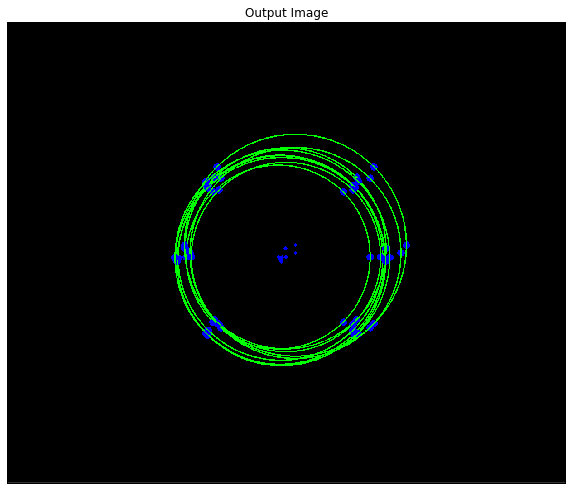

In [17]:
debug_img = np.zeros((rows, cols, 3), np.uint8)

pt_clusters=[ []  for x in xrange(7) ]
pt_averages=[ ]

# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circle_coords:
    #print "Center: ", (x,y), " Radius: ", r
    pts = ip.findPtsOnCircle((x, y), r)
    pts = np.uint16(np.around(pts, 0))
    #print pts
    pt_clusters[0].append( (x,y) )
    for idx, pt in enumerate(pts):
        cv2.circle(debug_img, (pt[0], pt[1]), 5, (0,0,255),5)
        pt_clusters[idx+1].append( (pt[0], pt[1]) )

    # draw the outer circle
    cv2.circle(debug_img, (x, y), r, (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(debug_img, (x, y), 2, (0,0,255),3)
    
#print pt_clusters
#print "  >>> len(pt_clusters) = ", len(pt_clusters)
for pt_cluster in pt_clusters:
    #print "    >>> len(pt_cluster) = ", len(pt_cluster)
    pt_averages.append(ip.findAvePt(pt_cluster))
#pt_averages = np.uint16(np.around(pt_averages, 0))
#print pt_averages
ellipse_fit_pts = np.array(pt_averages[1:])  
ellipse = cv2.fitEllipse(ellipse_fit_pts) 

util.plot_imgs([(debug_img, 'Output Image')], color=True)